In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from utilities import draw_samples, render_flow_gif
from robot_flows import smooth_robot_registration, wasserstein_flow

[KeOps] Warning : CUDA libraries not found or could not be loaded; Switching to CPU only.
[KeOps] Warning : OpenMP library not found, it must be downloaded through Homebrew for apple Silicon chips
[KeOps] Warning : OpenMP support is not available. Disabling OpenMP.


In [2]:
use_cuda = torch.cuda.is_available()
dtype = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
device = torch.device("cuda" if use_cuda else "cpu")
print("Using device:", device)

Using device: cpu


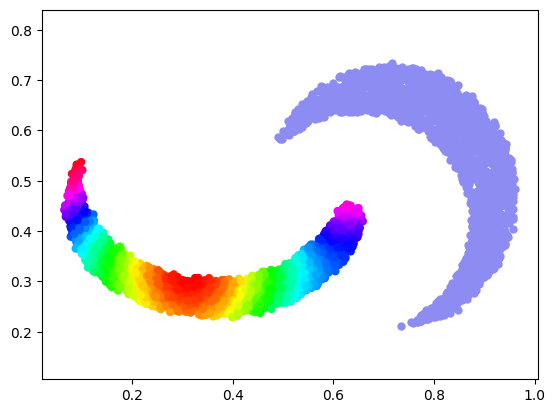

In [3]:
N, M = (2000, 2000) if not use_cuda else (10000, 10000)

X_i = draw_samples("data/moon_a.png", N, dtype).to(device)
Y_j = draw_samples("data/moon_b.png", M, dtype).to(device)

#affine transformation of X_i
#theta = np.pi / 6  # rotation angle
#scale = 1.8       # scaling factor
#translation = torch.tensor([0.5, -0.5], device=device).type(dtype)

#Y_j = scale * torch.tensor([[np.cos(theta), -np.sin(theta)],
#                            [np.sin(theta),  np.cos(theta)]], device=device).type(dtype) @ X_i.t()
#Y_j = Y_j.t() + translation
#Y_j += 0.02 * torch.randn_like(Y_j)
#Y_j = Y_j.contiguous()

A_i = torch.ones((N, 1), device=device) / N
B_j = torch.ones((1, M), device=device) / M

colors = (np.cos(10 * X_i[:, 0].cpu().numpy()) + np.cos(10 * X_i[:, 1].cpu().numpy()))
plt.scatter(X_i[:, 0].cpu(), X_i[:, 1].cpu(), 25, colors, cmap='hsv')
plt.scatter(Y_j[:, 0].cpu(), Y_j[:, 1].cpu(), 25, [(0.55, 0.55, 0.95)])
plt.axis("equal");

## Wasserstein flows

In [4]:
lr = 0.05
epsilon = 0.0005
rho = 0.5
threshold = None

100%|██████████| 101/101 [00:06<00:00, 15.72it/s]


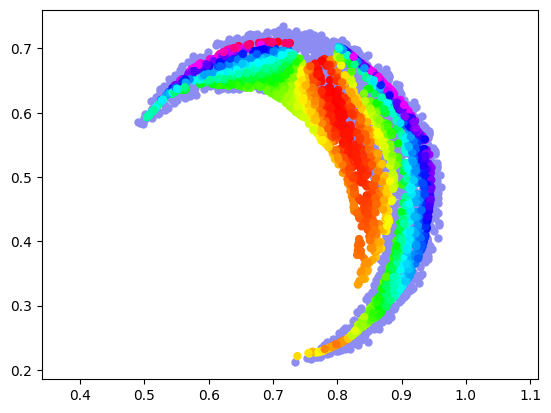

In [5]:
x_final, history = wasserstein_flow(X_i, Y_j, A_i, B_j, lr, epsilon, rho, save_history=True)

plt.scatter(Y_j[:, 0].cpu(), Y_j[:, 1].cpu(), 25, [(0.55, 0.55, 0.95)])
plt.scatter(x_final[:, 0].cpu(), x_final[:, 1].cpu(), 25, colors, cmap='hsv')
plt.axis("equal");

In [6]:
render_flow_gif(history, X_i, Y_j, threshold, "wasserstein_flows.gif")

Render (60 frames)...
GIF saved : wasserstein_flows.gif


## Registration

In [7]:
mode = 'affine'
smooth = True
epsilon = 0.005
rho = 2.2
Nsteps = 20

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20)}


100%|██████████| 21/21 [00:01<00:00, 13.77it/s]


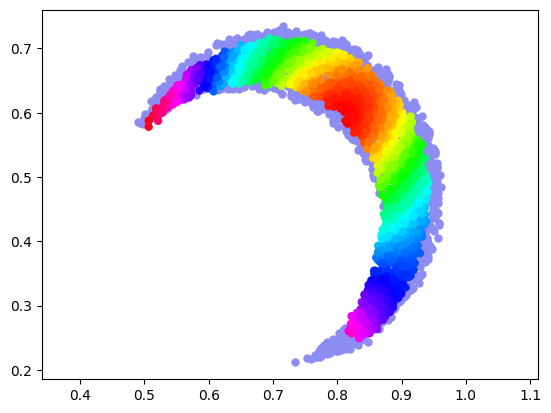

In [8]:
A, h, x_final, history = smooth_robot_registration(X_i, Y_j, A_i, B_j, mode=mode, smooth=smooth, epsilon=epsilon, rho=rho, Nsteps=Nsteps)
plt.scatter(Y_j[:, 0].cpu(), Y_j[:, 1].cpu(), 25, [(0.55, 0.55, 0.95)])
plt.scatter(x_final[:, 0].cpu(), x_final[:, 1].cpu(), 25, colors, cmap='hsv')
plt.axis("equal");

In [9]:
render_flow_gif(history, X_i, Y_j, threshold, "robot_registration.gif", fps=7)

Render (31 frames)...
GIF saved : robot_registration.gif
